# MSLE Loss for age prediction task and using DenseNet+MobileNet+ResNet

# Import Libraries and dataset

In [ ]:
#import pandas
import pandas as pd

#import numpy an set random seed
import numpy as np
np.random.seed(30)
  
#import seaborn
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import os


### Check for GPU type

In [ ]:
!nvidia-smi

Wed Aug  4 08:12:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
create_files=1

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os


In [ ]:
import zipfile

Extract CheXPert dataset

In [ ]:
if create_files==1:
   zipref=zipfile.ZipFile('/content/gdrive/MyDrive/upgrad/LJMU/CheXpert-v1.0-small.zip')
   zipref.extractall()

In [ ]:
#import random number
import random as rn
rn.seed(50)

In [ ]:
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2
import os
import re

### Read train csv file

In [ ]:
main_train_csv=pd.read_csv("./CheXpert-v1.0-small/train.csv")

In [ ]:
main_train_csv

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


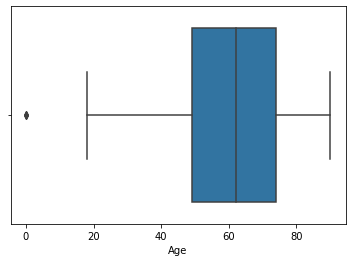

In [ ]:
sns.boxplot(main_train_csv.Age)

In [ ]:
main_train_csv[main_train_csv.Age<18]

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0
223413,CheXpert-v1.0-small/train/patient64540/study1/...,Female,0,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


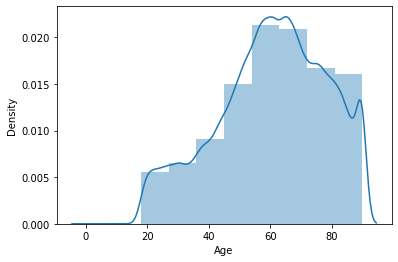

In [ ]:
sns.distplot(main_train_csv.Age,bins=10)

In [ ]:
main_train_csv=main_train_csv[main_train_csv.Age>=10]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


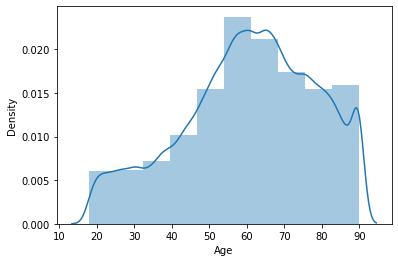

In [ ]:
sns.distplot(main_train_csv.Age,bins=10)

In [ ]:
main_train_csv.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

In [ ]:
cols=main_train_csv.columns
cols=cols[6:-1]
cols

Index(['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture'],
      dtype='object')

# Graph of Frontal Vs Lateral XRays

In [ ]:
front_lateral=main_train_csv.groupby('Frontal/Lateral').count()['Path']

In [ ]:
front_lateral.values

array([191024,  32387])

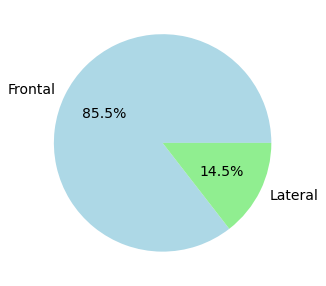

In [ ]:
plt.figure(figsize=(5,5))
patches, texts, autotexts=plt.pie(front_lateral.values,labels=front_lateral.index,autopct="%.1f%%",colors=['lightblue','lightgreen'],
                                 textprops={'fontsize': 14})
plt.show()

In [ ]:
sex=main_train_csv.groupby('Sex').count()['Path']

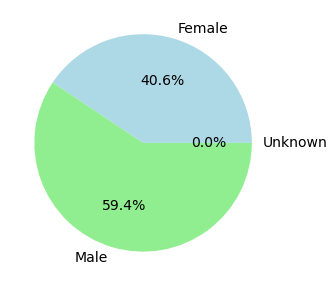

In [ ]:
plt.figure(figsize=(5,5))
patches, texts, autotexts=plt.pie(sex.values,labels=sex.index,autopct="%.1f%%",colors=['lightblue','lightgreen'],
                                 textprops={'fontsize': 14})
plt.show()

In [ ]:
main_train_csv=main_train_csv[main_train_csv['Sex']!='Unknown']

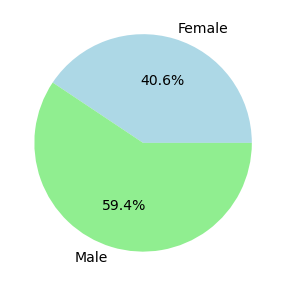

In [ ]:
sex=main_train_csv.groupby('Sex').count()['Path']

plt.figure(figsize=(5,5))
patches, texts, autotexts=plt.pie(sex.values,labels=sex.index,autopct="%.1f%%",colors=['lightblue','lightgreen'],
                                 textprops={'fontsize': 14})
plt.show()

# Graph plots of pathologies

In [ ]:
cols=main_train_csv.columns[5:]

In [ ]:
cols

Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

In [ ]:
path_count=[main_train_csv[main_train_csv[col]==1.0].shape[0] for col in cols]

In [ ]:
path_count_uncert=[main_train_csv[main_train_csv[col]==-1.0].shape[0] for col in cols]

In [ ]:
path_count_negative=[main_train_csv[(main_train_csv[col]==0.0) | (main_train_csv[col].isnull())].shape[0] for col in cols]

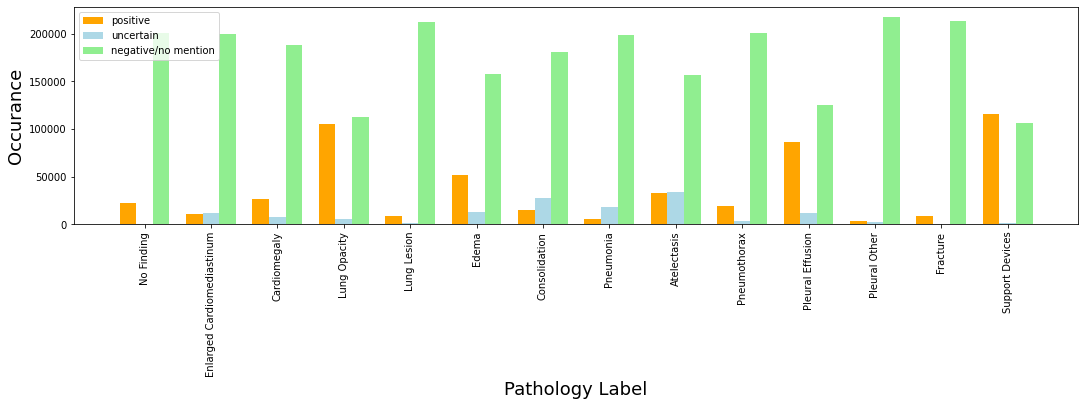

In [ ]:
plt.figure(figsize=(18,4))

X_axis = np.arange(len(cols))


plt.bar(X_axis-0.25,path_count,0.25,color='orange',label='positive')
plt.bar(X_axis+0.0,path_count_uncert,0.25,color='lightblue',label='uncertain')
plt.bar(X_axis+0.25,path_count_negative,0.25,color='lightgreen',label='negative/no mention')

plt.xticks(X_axis, cols)

plt.xlabel('Pathology Label',fontsize=18)
plt.ylabel('Occurance',fontsize=18)
plt.xticks(rotation=90)
plt.legend(loc="upper left")


plt.show()

# Age prediction task

In [ ]:
main_train_nofinding=main_train_csv[main_train_csv['No Finding']==1.0]
main_train_nofinding

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Lateral,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0
8,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Lateral,NaN,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223386,CheXpert-v1.0-small/train/patient64517/study1/...,Male,21,Frontal,AP,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
223388,CheXpert-v1.0-small/train/patient64519/study1/...,Female,33,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0
223389,CheXpert-v1.0-small/train/patient64520/study1/...,Female,65,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223391,CheXpert-v1.0-small/train/patient64522/study1/...,Female,21,Frontal,AP,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


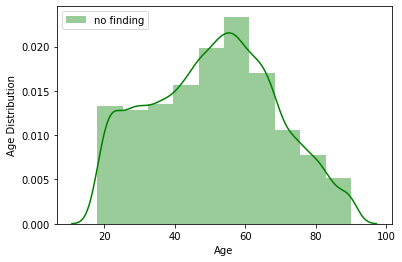

In [ ]:
sns.distplot(main_train_nofinding.Age,bins=10,label="no finding",color='Green')
plt.legend(loc="upper left")
plt.ylabel("Age Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


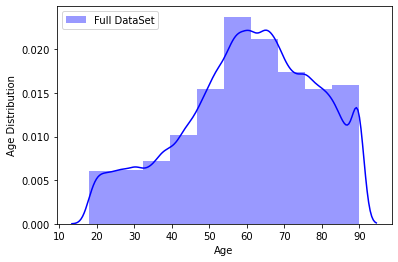

In [ ]:
sns.distplot(main_train_csv.Age,bins=10,label="Full DataSet",color='blue')
plt.legend(loc="upper left")
plt.ylabel("Age Distribution")
plt.show()

# U_Zeros (Binary Transformation)

In [ ]:
main_train_csv_u_zeros=main_train_csv.copy()

In [ ]:
main_train_csv_u_zeros

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223406,CheXpert-v1.0-small/train/patient64535/study1/...,Male,60,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
223407,CheXpert-v1.0-small/train/patient64536/study2/...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
223408,CheXpert-v1.0-small/train/patient64536/study1/...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN


In [ ]:
for col in cols:
    print(col)

No Finding
Enlarged Cardiomediastinum
Cardiomegaly
Lung Opacity
Lung Lesion
Edema
Consolidation
Pneumonia
Atelectasis
Pneumothorax
Pleural Effusion
Pleural Other
Fracture
Support Devices


## convert to u_zeros data frame

In [ ]:
def map_uncertain_to_positive(x):
    if x==-1.0:
        return 1.0
    else:
        return x

In [ ]:
for col in cols:
   main_train_csv_u_zeros[col]=main_train_csv_u_zeros[col].apply(lambda x:map_uncertain_to_positive(x))

main_train_csv_u_zeros=main_train_csv_u_zeros.fillna(0)

main_train_csv_u_zeros['Abnormal']=0

# Read u_zeros dataframe and process it

In [ ]:
main_train_csv_u_zeros['Abnormal']=0

In [ ]:
main_cols=main_train_csv_u_zeros.columns
tst=list(main_cols[:5])
tst.append(main_cols[-1])

main_cols=tst

main_cols

['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'Abnormal']

In [ ]:
def map_uncertain_to_normal(x):
    if x==-1.0:
        return 0
    else:
        return x


In [ ]:
def map_uncertain_to_positive(x):
    if x==-1.0:
        return 1.0
    else:
        return x


For ease of development, Load the processed dataframe, which contains Abnormal column mapped based on  pathology information.

In [ ]:
u_zeros_df=pd.read_csv("/content/gdrive/MyDrive/upgrad/LJMU/ProcessedDataFrame.csv")[main_cols]

In [ ]:
u_zeros_df['Abnormal']=u_zeros_df['Abnormal'].apply(lambda x: map_uncertain_to_normal(x))
# u_zeros_df=u_zeros_df[u_zeros_df['Abnormal']!=-1]

In [ ]:
u_zeros_df.groupby('Abnormal').count()

,Path,Sex,Age,Frontal/Lateral,AP/PA
Abnormal,,,,,
0,33796,33796,33796,33796,25834
1,183519,183519,183519,183519,161009


Filter for Frontal X-ray images

In [ ]:
u_zeros_df=u_zeros_df[u_zeros_df['Frontal/Lateral']=="Frontal"].reset_index(drop=True)

In [ ]:
u_zeros_df.groupby('Abnormal').count()

,Path,Sex,Age,Frontal/Lateral,AP/PA
Abnormal,,,,,
0,25834,25834,25834,25834,25834
1,161009,161009,161009,161009,161009


Encode Sex and Frontal/Lateral column using label encoding

In [ ]:
label=LabelEncoder()

u_zeros_df.Sex=label.fit_transform(u_zeros_df.Sex)


In [ ]:
u_zeros_df['Frontal/Lateral']=label.fit_transform(u_zeros_df['Frontal/Lateral'])

In [ ]:
u_zeros_df_normal=u_zeros_df[u_zeros_df['Abnormal']==0.0].reset_index(drop=True)

## Visualize X-ray images

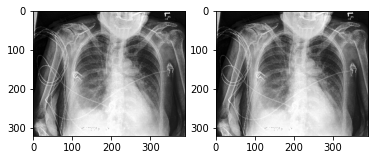

In [ ]:
image=cv2.imread(u_zeros_df['Path'][10001])

def hisEqulColor(img):
    ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
    channels=cv2.split(ycrcb)
    #print len(channels)
    cv2.equalizeHist(channels[0],channels[0])
    cv2.equalizeHist(channels[1],channels[1])
    cv2.equalizeHist(channels[2],channels[2])

    cv2.merge(channels,ycrcb)
    cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR,img)
    return img

hist_equalized_image=hisEqulColor(image)

fig = plt.figure()

ax = fig.add_subplot(121)

ax.imshow(hist_equalized_image)

ax = fig.add_subplot(122)
src=cv2.imread(u_zeros_df['Path'][10001])
ax.imshow(src)

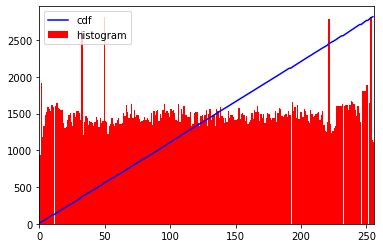

In [ ]:
hist,bins = np.histogram(hist_equalized_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(hist_equalized_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

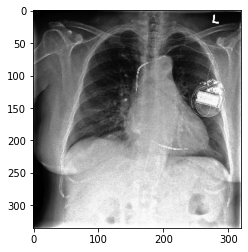

In [ ]:
src=cv2.imread(u_zeros_df['Path'][100])
plt.imshow(src)

Take entire dataset

In [ ]:
u_zeros_df=u_zeros_df.loc[:223410]

## Test Train Split

Split in to train and validation sets based on patient ID information

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
u_zeros_df=u_zeros_df[u_zeros_df['Age']<=90]
u_zeros_df=u_zeros_df[u_zeros_df['Age']!=0]
u_zeros_df=u_zeros_df.reset_index(drop=True)


In [ ]:
u_zeros_df['PatientID']=u_zeros_df['Path'].apply(lambda x:x[33:38])

Group dataset based on patient ID

In [ ]:
u_zeros_df_group_by_patientID=u_zeros_df.groupby('PatientID').count()

split grouped data based on patient ID

In [ ]:
train_data,val_data=train_test_split(u_zeros_df_group_by_patientID,test_size=0.1,random_state=10)

In [ ]:
u_zeros_df_train=pd.DataFrame(columns=u_zeros_df.columns)
u_zeros_df_val=pd.DataFrame(columns=u_zeros_df.columns)

Create train dataset for patient id's mapped to train_data

In [ ]:
train_data_true_false=[True if pid in train_data.index else False for pid in u_zeros_df.PatientID ]

u_zeros_df_train=u_zeros_df[train_data_true_false].reset_index(drop=True)
u_zeros_df_train

,Path,Sex,Age,Frontal/Lateral,AP/PA,Abnormal,PatientID
0,CheXpert-v1.0-small/train/patient00001/study1/...,0,68,0,AP,0,00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,0,87,0,AP,1,00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,0,83,0,AP,1,00002
3,CheXpert-v1.0-small/train/patient00003/study1/...,1,41,0,AP,1,00003
4,CheXpert-v1.0-small/train/patient00004/study1/...,0,20,0,PA,0,00004
...,...,...,...,...,...,...,...
168174,CheXpert-v1.0-small/train/patient64535/study1/...,1,60,0,AP,1,64535
168175,CheXpert-v1.0-small/train/patient64536/study2/...,0,61,0,AP,1,64536
168176,CheXpert-v1.0-small/train/patient64536/study1/...,0,61,0,AP,1,64536
168177,CheXpert-v1.0-small/train/patient64537/study2/...,1,59,0,AP,1,64537


Create validation dataset for patient id's mapped to val_data


In [ ]:
val_data_true_false=[True if pid in val_data.index else False for pid in u_zeros_df.PatientID ]

u_zeros_df_val=u_zeros_df[val_data_true_false].reset_index(drop=True)
u_zeros_df_val

,Path,Sex,Age,Frontal/Lateral,AP/PA,Abnormal,PatientID
0,CheXpert-v1.0-small/train/patient00006/study1/...,0,42,0,AP,0,00006
1,CheXpert-v1.0-small/train/patient00008/study1/...,1,81,0,AP,1,00008
2,CheXpert-v1.0-small/train/patient00008/study2/...,1,81,0,AP,1,00008
3,CheXpert-v1.0-small/train/patient00014/study1/...,0,43,0,PA,0,00014
4,CheXpert-v1.0-small/train/patient00021/study1/...,0,36,0,PA,0,00021
...,...,...,...,...,...,...,...
18656,CheXpert-v1.0-small/train/patient64504/study1/...,0,87,0,AP,1,64504
18657,CheXpert-v1.0-small/train/patient64510/study1/...,0,73,0,AP,1,64510
18658,CheXpert-v1.0-small/train/patient64518/study1/...,1,68,0,AP,1,64518
18659,CheXpert-v1.0-small/train/patient64525/study1/...,1,87,0,AP,1,64525


# Data Loader

In [ ]:
u_zeros_df_train

,Path,Sex,Age,Frontal/Lateral,AP/PA,Abnormal,PatientID
0,CheXpert-v1.0-small/train/patient00001/study1/...,0,68,0,AP,0,00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,0,87,0,AP,1,00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,0,83,0,AP,1,00002
3,CheXpert-v1.0-small/train/patient00003/study1/...,1,41,0,AP,1,00003
4,CheXpert-v1.0-small/train/patient00004/study1/...,0,20,0,PA,0,00004
...,...,...,...,...,...,...,...
168174,CheXpert-v1.0-small/train/patient64535/study1/...,1,60,0,AP,1,64535
168175,CheXpert-v1.0-small/train/patient64536/study2/...,0,61,0,AP,1,64536
168176,CheXpert-v1.0-small/train/patient64536/study1/...,0,61,0,AP,1,64536
168177,CheXpert-v1.0-small/train/patient64537/study2/...,1,59,0,AP,1,64537


In [ ]:
from scipy import ndimage

In [ ]:
max_train_age=u_zeros_df_train['Age'].max()
max_train_age

90

## Data Generator Method

Hyperparameters for training of multiask methods

In [ ]:
img_size=300
img_size_mobile=224
img_size_resnet=334

batch_size=60
num_epochs=15

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE

Create Tensorflow Dataset for loading information to model during training

In [ ]:
paths=list(u_zeros_df_train['Path'])
labels_abnormal=list(u_zeros_df_train['Abnormal'])
labels_age=list(u_zeros_df_train['Age'])

In [ ]:
def _load_and_preprocess_image(image):
    print('image->',image)
    img = tf.io.read_file(image)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.cast(img, tf.float32)
    newSize = (img_size, img_size)

    img=tf.cast(img/255. ,tf.float32)

    new_img = tf.image.resize(img,newSize)

    newSize_mobilenet = (img_size_mobile, img_size_mobile)
    new_img_mobilenet = tf.image.resize(img,newSize_mobilenet)

    newSize_resnet = (img_size_resnet, img_size_resnet)
    new_img_resnet = tf.image.resize(img,newSize_resnet)

    return (new_img,new_img_mobilenet,new_img_resnet)

In [ ]:
def _load_and_preprocess_from_path_label(path,labels):
  abnormal=tf.cast(labels[0], tf.float32)
  age=tf.cast(labels[1], tf.float32)
  return _load_and_preprocess_image(path),(abnormal,age)

In [ ]:
train_generator = tf.data.Dataset.from_tensor_slices((paths,(labels_abnormal,labels_age)))
train_generator=train_generator.map(_load_and_preprocess_from_path_label, num_parallel_calls=tf.data.experimental.AUTOTUNE).shuffle(buffer_size=1000).batch(batch_size).repeat(num_epochs).prefetch(tf.data.experimental.AUTOTUNE)


image-> Tensor("args_0:0", shape=(), dtype=string)


In [ ]:
paths_val=list(u_zeros_df_val['Path'])
labels_abnormal_val=list(u_zeros_df_val['Abnormal'])
labels_age_val=list(u_zeros_df_val['Age'])

In [ ]:
val_generator = tf.data.Dataset.from_tensor_slices((paths_val,(labels_abnormal_val,labels_age_val)))
val_generator=val_generator.map(_load_and_preprocess_from_path_label, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(batch_size).repeat(num_epochs).prefetch(tf.data.experimental.AUTOTUNE)


image-> Tensor("args_0:0", shape=(), dtype=string)


# Model building

In [ ]:
from keras import backend
backend.set_image_data_format('channels_last')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout,Concatenate,Input
from tensorflow.keras.layers import Conv3D, MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout,LSTM,GlobalAveragePooling2D,GlobalAveragePooling3D
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.constraints import unit_norm


In [ ]:
from tensorflow.keras.applications import DenseNet121,DenseNet169,DenseNet201
from tensorflow.keras.applications import MobileNetV2,ResNet50V2

from tensorflow.keras.models import Model
import keras

import sklearn
import sklearn.metrics

In [ ]:
train_sample_count=u_zeros_df_train.groupby('Abnormal').count()['Path']
normal_count=train_sample_count.loc[0]
abnormal_count=train_sample_count.loc[1]

Use Weighted Binary Cross Entropy function

In [ ]:
one_weight = 1-((abnormal_count)/(abnormal_count + normal_count))
zero_weight = 1-((normal_count)/(abnormal_count + normal_count))
(one_weight,zero_weight)

(0.13830502024628522, 0.8616949797537148)

In [ ]:
def weighted_binary_crossentropy(y_true, y_pred):

        b_ce = K.binary_crossentropy(y_true, y_pred)

        # weighted calc
        weight_vector = y_true * one_weight + (1 - y_true) * zero_weight
        weighted_b_ce = weight_vector * b_ce

        return K.mean(weighted_b_ce)

Metrics to track

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Create multiask model using combinatin of different pretrained models

In [ ]:
def getModel():
    
    # Use DenseNet model
    denseNet = DenseNet169(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
    split_at = 350
    for layer in denseNet.layers[:split_at]: layer.trainable = False
    for layer in denseNet.layers[split_at:]: layer.trainable = True
    base_model=denseNet(denseNet.input)
    base_model=GlobalAveragePooling2D()(base_model)
    base_model=Flatten()(base_model)

    # Use MobileNet model
    mobileNet_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(img_size_mobile,img_size_mobile,3))
    split_at = 80
    for layer in mobileNet_model.layers[:split_at]: layer.trainable = False
    for layer in mobileNet_model.layers[split_at:]: layer.trainable = True
    base_model_mobilenet=mobileNet_model(mobileNet_model.input)
    base_model_mobilenet=GlobalAveragePooling2D()(base_model_mobilenet)
    base_model_mobilenet=Flatten()(base_model_mobilenet)

    # Use ResNet model
    resNet_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_size_resnet,img_size_resnet,3))

    for w in resNet_model.weights:
        w._handle_name = 'EP_'  +  w.name

    split_at = 130
    for layer in resNet_model.layers[:split_at]: layer.trainable = False
    for layer in resNet_model.layers[split_at:]: layer.trainable = True
    base_model_resNet_model=resNet_model(resNet_model.input)
    base_model_resNet_model=GlobalAveragePooling2D()(base_model_resNet_model)
    base_model_resNet_model=Flatten()(base_model_resNet_model)

    # Join all model togeather
    base_model=Concatenate()([base_model,base_model_mobilenet,base_model_resNet_model])

    # Abnormality detection task
    model_pathology=Dense(1,activation='sigmoid',name='Pathology')(base_model)

    # Age prediciton task
    model_age=Dense(1,activation='relu',name='Age')(base_model)
   
   
    # Create multitask model
    model=tf.keras.models.Model([denseNet.input,mobileNet_model.input,resNet_model.input],[model_pathology,model_age])
    return model 

In [ ]:
from keras import backend as K


Create multitask model and compile it

In [ ]:
model=getModel() 
optimiser = optimizers.Adam()

model.compile(optimizer=optimiser, loss={'Pathology':weighted_binary_crossentropy,'Age':'mean_squared_logarithmic_error'},
              metrics={'Pathology':['accuracy',f1_m,precision_m, recall_m],'Age':['mean_absolute_error'] })


print (model.summary())

94674944/94668760 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 334, 334, 3) 0                                            
__________________________________________________________________________________________________
densenet169 (Functional)        (None, 9, 9, 1664)   12642880    input_1[0][0]                    
_____________________________

# CALL BACK LIST

In [ ]:
from datetime import datetime
import io
import itertools
import numpy as np
import sklearn.metrics

In [ ]:
model_name = '/content/gdrive/MyDrive/upgrad/LJMU/'+'model_init' + '/'
    
if not os.path.exists(model_name):
   os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-bestmodel.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_Pathology_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='max', save_freq='epoch')


In [ ]:
num_train_sequences=u_zeros_df_train.shape[0]
num_val_sequences=u_zeros_df_val.shape[0]


if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [ ]:
callbacks_list = [checkpoint]

## Model Training

In [ ]:
num_train_sequences=u_zeros_df_train.shape[0]
num_val_sequences=u_zeros_df_val.shape[0]

In [ ]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [ ]:

history=model.fit(train_generator, epochs=num_epochs, steps_per_epoch=steps_per_epoch,verbose=1, 
                    validation_data=val_generator,  validation_steps=validation_steps,
                     class_weight=None, workers=3, initial_epoch=0,callbacks=callbacks_list)

Epoch 1/15
2803/2803 [==============================] - 1889s 660ms/step - loss: 0.1738 - Pathology_loss: 0.1284 - Age_loss: 0.0455 - Pathology_accuracy: 0.7473 - Pathology_f1_m: 0.8275 - Pathology_precision_m: 0.9489 - Pathology_recall_m: 0.7463 - Age_mean_absolute_error: 7.9140 - val_loss: 0.1659 - val_Pathology_loss: 0.1374 - val_Age_loss: 0.0285 - val_Pathology_accuracy: 0.6122 - val_Pathology_f1_m: 0.7011 - val_Pathology_precision_m: 0.9617 - val_Pathology_recall_m: 0.5641 - val_Age_mean_absolute_error: 7.1983

Epoch 00001: saving model to /content/gdrive/MyDrive/upgrad/LJMU/model_init/model-00001-bestmodel.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
2803/2803 [==============================] - 1844s 658ms/step - loss: 0.1454 - Pathology_loss: 0.1221 - Age_loss: 0.0233 - Pathology_accuracy: 0.7635 - Pathology_f1_m: 0.8417 - Pathology_precision_m: 0.9526 - Pathology_recall_m: 0.7628 - Age_mean_absolute_error: 6.6204 - val_loss: 0.1767 - val_Pathology_loss: 0.1344 - val_Age_loss: 0.0423 - val_Pathology_accuracy: 0.6406 - val_Pathology_f1_m: 0.7296 - val_Pathology_precision_m: 0.9587 - val_Pathology_recall_m: 0.6003 - val_Age_mean_absolute_error: 9.4297

Epoch 00002: saving model to /content/gdrive/MyDrive/upgrad/LJMU/model_init/model-00002-bestmodel.h5
Epoch 3/15
2803/2803 [==============================] - 1845s 658ms/step - loss: 0.1384 - Pathology_loss: 0.1175 - Age_loss: 0.0209 - Pathology_accuracy: 0.7729 - Pathology_f1_m: 0.8497 - Pathology_precision_m: 0.9550 - Pathology_recall_m: 0.7721 - Age_mean_absolute_error: 6.3110 - val_loss: 0.1601 - val_Pathology_loss: 0.1265 - val_Age_loss: 0.0336 - val_Pathology_accuracy:

In [ ]:
import os
import shutil
os.getcwd()

'/content'

# Test

Choosing model at epoch 6, which showed optimal performance on both abnormality detection and age prediction tasks

In [ ]:
model_name = '/content/gdrive/MyDrive/upgrad/LJMU/model_init/model-00006-bestmodel.h5'

model_load = tf.keras.models.load_model(model_name,compile=False)

In [ ]:
main_test_csv=pd.read_csv("./CheXpert-v1.0-small/valid.csv")

In [ ]:
cols=main_test_csv.columns[6:-1]
cols

Index(['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture'],
      dtype='object')

In [ ]:
# create  processing dataframe
main_test_csv['drop']=0
count=0
for row in range(main_test_csv.shape[0]):
    if 1 not in list(main_test_csv.loc[row,cols]) and -1 not in list(main_test_csv.loc[row,cols]) and main_test_csv.loc[row,'No Finding']!=1:
        main_test_csv.loc[row,'drop']=1            
        count=count+1
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
main_test_csv=main_test_csv[main_test_csv['drop']!=1].reset_index(drop=True)

In [ ]:
# create  processing dataframe
main_test_csv['Abnormal']=0
count=0
for row in range(main_test_csv.shape[0]):
    if 1 in list(main_test_csv.loc[row,cols]):
        main_test_csv.loc[row,'Abnormal']=1
    elif -1 in list(main_test_csv.loc[row,cols]):
        main_test_csv.loc[row,'Abnormal']=-1            
    else:
        main_test_csv.loc[row,'Abnormal']=0            
       
        count=count+1
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [ ]:
main_cols=main_train_csv_u_zeros.columns
tst=list(main_cols[:5])
tst.append(main_cols[-1])

main_cols=tst

main_cols

['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'Abnormal']

In [ ]:
main_test_csv=main_test_csv[main_cols]

In [ ]:
main_test_csv=main_test_csv[main_test_csv['Frontal/Lateral']=="Frontal"].reset_index(drop=True)

In [ ]:
label=LabelEncoder()

main_test_csv.Sex=label.fit_transform(main_test_csv.Sex)
main_test_csv['Frontal/Lateral']=label.fit_transform(main_test_csv['Frontal/Lateral'])

In [ ]:
main_test_csv=main_test_csv[main_test_csv['Age']<=90]
main_test_csv=main_test_csv[main_test_csv['Age']!=0]


main_test_csv=main_test_csv.reset_index(drop=True)


In [ ]:
paths_test=list(main_test_csv['Path'])
labels_abnormal_test=list(main_test_csv['Abnormal'])
labels_age_test=list(main_test_csv['Age'])

In [ ]:
test_gen = tf.data.Dataset.from_tensor_slices((paths_test,(labels_abnormal_test,labels_age_test)))
test_gen=test_gen.map(_load_and_preprocess_from_path_label, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

image-> Tensor("args_0:0", shape=(), dtype=string)


In [ ]:
if (main_test_csv.shape[0]%batch_size) == 0:
    test_steps = int(main_test_csv.shape[0]/batch_size)
else:
    test_steps = (main_test_csv.shape[0]//batch_size) + 1

pred_prob=model_load.predict(test_gen,steps=test_steps)

In [ ]:
pred=[it[0] for it in pred_prob[0]]

In [ ]:
pred=[1.0 if it>0.5 else 0.0 for it in pred]

In [ ]:
import sklearn
import sklearn.metrics

# Check Abnormality

In [ ]:
sklearn.metrics.confusion_matrix(main_test_csv['Abnormal'],pred)

array([[ 21,   5],
       [ 18, 128]])

In [ ]:
sklearn.metrics.precision_recall_fscore_support(main_test_csv['Abnormal'],pred)

(array([0.53846154, 0.96240602]),
 array([0.80769231, 0.87671233]),
 array([0.64615385, 0.91756272]),
 array([ 26, 146]))

In [ ]:
print(sklearn.metrics.classification_report(y_pred=pred ,y_true=main_test_csv['Abnormal']))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65        26
           1       0.96      0.88      0.92       146

    accuracy                           0.87       172
   macro avg       0.75      0.84      0.78       172
weighted avg       0.90      0.87      0.88       172



In [ ]:
age_pred=[it[0] for it in pred_prob[1]]

In [ ]:
diff_age=abs(age_pred-main_test_csv['Age'])

In [ ]:
sum(diff_age)/len(diff_age)

6.304514330486919

In [ ]:
import statistics
statistics.median(diff_age)

5.361225128173828

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


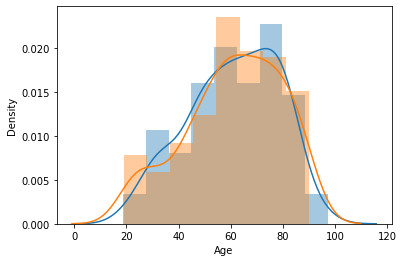

In [ ]:
sns.distplot(age_pred)
sns.distplot(main_test_csv['Age'])

Age value less than 9 years

In [ ]:
sum(diff_age<9)/len(diff_age)

0.7848837209302325

Age value less than 13 years

In [ ]:
sum(diff_age<13)/len(diff_age)

0.9069767441860465

Age value less than 10 years

In [ ]:
sum(diff_age<10)/len(diff_age)

0.8255813953488372

In [ ]:
main_test_csv[diff_age>0.1].groupby('Abnormal').count()

,Path,Sex,Age,Frontal/Lateral,AP/PA
Abnormal,,,,,
0,25,25,25,25,25
1,145,145,145,145,145


In [ ]:
main_test_csv[diff_age>0.1]['Age'].min()

21

In [ ]:
sum(diff_age<6)/len(diff_age)

0.5348837209302325

In [ ]:
sum(diff_age<4)/len(diff_age)

0.37790697674418605

In [ ]:
testval=100

In [ ]:
# precision-recall curve and f1 for an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


from matplotlib import pyplot
from sklearn.metrics import roc_auc_score,average_precision_score

In [ ]:
pred=[it[0] for it in pred_prob[0]]

In [ ]:
roc_auc_score(main_test_csv['Abnormal'],pred)

0.928872497365648

In [ ]:
average_precision_score(main_test_csv['Abnormal'],pred)

0.9869787280190027

In [ ]:
pred=[it[0] for it in pred_prob[0]]

In [ ]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(main_test_csv['Abnormal'],pred)


In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.928872497365648

In [ ]:
import sklearn.metrics as metrics

# AUC Curve

In [ ]:
pred=[it[0] for it in pred_prob[0]]

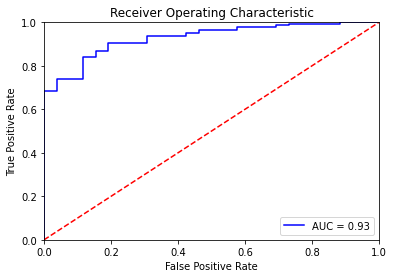

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(main_test_csv['Abnormal'],pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pred=[it[0] for it in pred_prob[0]]

In [ ]:
pred_val=[1.0 if it>0.5 else 0.0 for it in pred]

In [ ]:
sklearn.metrics.confusion_matrix(main_test_csv['Abnormal'],pred_val)

array([[ 21,   5],
       [ 18, 128]])

In [ ]:
print(sklearn.metrics.classification_report(y_pred=pred_val ,y_true=main_test_csv['Abnormal']))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65        26
           1       0.96      0.88      0.92       146

    accuracy                           0.87       172
   macro avg       0.75      0.84      0.78       172
weighted avg       0.90      0.87      0.88       172



In [ ]:
pred=[it[0] for it in pred_prob[0]]

## AUPRC Curve

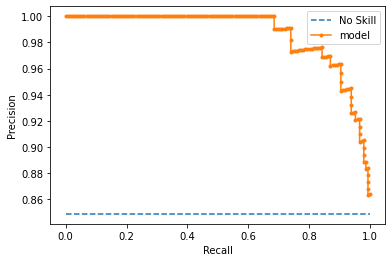

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(main_test_csv['Abnormal'],pred)
lr_f1, lr_auc = f1_score(main_test_csv['Abnormal'],pred_val), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(main_test_csv['Abnormal'][main_test_csv['Abnormal']==1]) / len(main_test_csv['Abnormal'])
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='model')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
lr_f1

0.9175627240143369

In [ ]:
lr_auc

0.9869317529997358

In [ ]:
average_precision = average_precision_score(main_test_csv['Abnormal'],pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.99


In [ ]:
precision, recall, thresholds = precision_recall_curve(main_test_csv['Abnormal'],pred)

In [ ]:
auc_score = auc(recall, precision)

In [ ]:
auc_score

0.9869317529997358